<a href="https://colab.research.google.com/github/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOv3 ile Nesne Dedektörü Oluşturma (GPU)**

Bu not defteri, GPU etkinken YOLOv3'ü kolayca bulutta oluşturmanıza yardımcı olacak, böylece gerçek zamanlı nesne algılamalarını çalıştırabilecek ve kendi özel nesne dedektörünüzü eğitebileceksiniz!

# Adım 1: Python not defterinde GPU'yu etkinleştirme

YOLOv3 ile sisteminizin 100'den fazla algılamayı CPU'dan daha hızlı işleyebilmesi için Colab not defterinde GPU'yu etkinleştirmeniz gerekir.

### Adımlar:

### 1) Not defterinin sol üst köşesinden **Edit** butonuna tıklayın

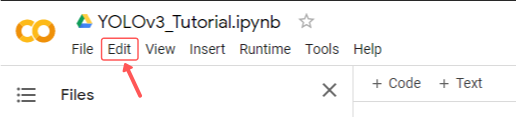
### 2) Ardından **Notebook Settings** tıklayın
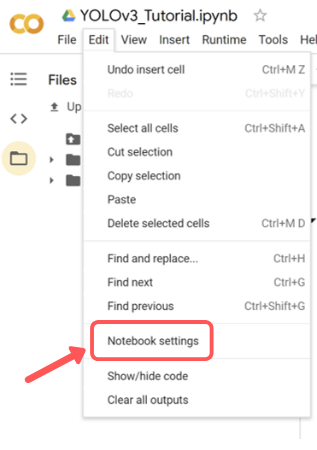
### 3) 'Hardware Accelerator' altında **GPU** seçin ve **Save** tıklayın.
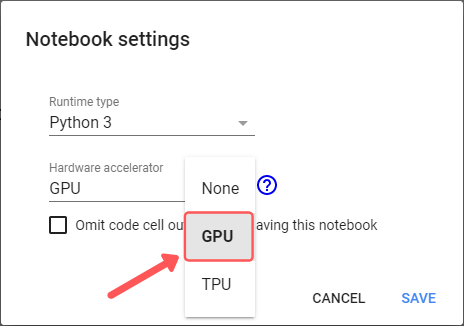

Not defteriniz artık GPU ile işlem yapmaya hazır!

# Adım 2: Darknet'i Klonlama ve Oluşturma

Aşağıdaki hücreler, darkneti AlexeyAB'ın reposundan klonlayacak, Makefile'ı darknet için OPENCV ve GPU'yu etkinleştirecek şekilde ayarlayacak ve ardından darkneti oluşturacak.

'!make' hücresini çalıştırdığınızda herhangi bir uyarı için endişelenmeyin!

In [0]:
# repodan darkneti klonla
!git clone https://github.com/AlexeyAB/darknet

In [0]:
# makefile'da GPU'yu aktif yap ve OPENCV etkinleştir
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [0]:
# CUDA'yı doğrula
!/usr/local/cuda/bin/nvcc --version

In [0]:
# make darknet (build yap (derle))
!make

# Adım 3: Google Drive'ını Bağla

Resimler ayrıca Google Drive'ınızdan yüklenebilir ve üzerlerinde kolayca işlemler yapılabilir.

İçeriğinize erişebilmeniz için google sürücünüzü bulut VM'sine eklemek üzere aşağıdaki hücreyi çalıştırmak gerekecek.

NOT: '/content/gdrive/My\ Drive/' ve '/mydrive arasında sembolik bir bağlantı oluşturacağız.

Bu, '/content/gdrive/My\ Drive/' klasöründeki içeriklerle eşleştirmek için sadece bir '/mydrive' kısayolu oluşturduğumuz anlamına geliyor.

Bunun nedeni, 'My Drive' klasör yolunda boşluk olması, bazı komutları çalıştırırken sorunlara neden olabilmesidir. Bu sembolik bağ bunun olmasını engelleyecek!

Artık darknet komutunu kullanarak YOLOv3'ü Google Drive'dan görüntülerle çalıştırabilirsiniz:

```
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/<path to image>
```

Görüntüleri Google Drive'ınızda yolov3 klasörü açarak içine obj.zip şeklinde atmanızı öneririm.

Alttaki kodu çalıştırdığınızda link çıkacak ve bu linke tıklayarak not defterinin Google Drive'nıza erişmesi için Aktivasyon Kodunu kopyalayıp kutucuğa yazmanız istenecek!

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# burası sembolik bir bağlantı oluşturacak: /content/gdrive/My\ Drive/ -> /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# **Bulutta YOLOv3 ile Nesne Dedektörünüzün Eğitimi!**

Şimdi eğlenceli kısmı geliyor! Kendi özel nesne dedektörünüzü oluşturma adımları buradan başlıyor, hepsi bulutta ücretsiz!

Özel bir YOLOv3 dedektörü oluşturmak için aşağıdakilere ihtiyacımız olacak:

*   Etiketli Özel Veri Seti
*   Özel .cfg dosyası
*   obj.data ve obj.names dosyaları
*   train.txt dosyası (test.txt burada isteğe bağlıdır)




     
     
     
     

# 1. Adım: Özel Veri Kümesini Toplama ve Etiketleme

Özel bir nesne dedektörü oluşturmak için iyi bir görüntü ve etiket veri setine ihtiyacınız vardır, böylece dedektör nesneleri algılamak için verimli bir şekilde eğitilebilir.

Bu iki şekilde yapılabilir. [Google resimlerini kullanarak](https://storage.googleapis.com/openimages/web/index.html) veya kendi veri kümenizi oluşturarak ve etiketleri manuel olarak çizmek için bir ek açıklama aracını kullanarak. (İlk yolu tavsiye ederim! ilk yol için internetten araştırma ile google'dan özel veri seti indirebilirsiniz)

İkinci yol ile [labelimg vb kullanarak](https://tzutalin.github.io/labelImg/) resimleri etiketlemeniz ve resim dosyaları ile txt dosyalarını aynı isim olacak şekilde bir dosyada tutmanız gerekmektedir. (Emre.jpg - Emre.txt)

# 2. Adım: Özel Veri Kümenizi Cloud VM'nize Taşıma

Artık veri kümenizi eğitim için kullanılacak şekilde doğru şekilde biçimlendirdiğinize göre, bunu bulut VM'sine taşımalıyız, böylece zamanı geldiğinde aslında eğitim için kullanabiliriz.

Yerel nesnenizdeki klasörün 'obj' olarak adlandırılacak görüntüleri ve metin dosyaları ile yeniden adlandırılmasını ve ardından 'obj' klasörünün bir .zip klasörünün oluşturulmasını öneririm. Ardından zip dosyasını Google Drive'ınıza yüklemeniz gerekecek. Dolayısıyla, Google sürücünüzde artık obj.zip bulunmalıdır.

Bu, veri kümemizi bulut sanal makinemize aktarma süresini büyük ölçüde azaltacaktır.

Şimdi zip'e kopyalayabilir ve bulut VM'nizde sıkıştırmayı kaldırabiliriz.

In [0]:
# burası zipimin saklandığı yer (gerekli dosyalarımı alacağım bir yolov3 klasörü oluşturdum)
!ls /mydrive/yolov3

In [0]:
# .zip dosyasını bulut VM'nin kök dizinine kopyalayın
!cp /mydrive/yolov3/obj.zip ../

In [0]:
# zip dosyasını açın ve içeriği şimdi /darknet/data/obj olmalıdır
!unzip ../obj.zip -d data/

# 3. Adım: Dosyaları Eğitim İçin Yapılandırma

Bu adım, özel .cfg dosyanızı, obj.data, obj.names ve train.txt dosyanızı düzgün bir şekilde yapılandırmayı içerir.

## a) cfg dosyası
cfg dosyası temelde tiny (basit) ve normal eğitim için kullanılmaktadır. Tiny ile eğitim daha çok düşük fps ile veri işleyen makineler içindir diğeri ise Geforce 1050 vb üzeri ekran kartı olan pc'ler içindir ve daha tutarlıdır.

cfg train ve cfg test dosyasını sırasıyla [buradan](https://github.com/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/yolov3_custom_train.cfg) ve [buradan](https://github.com/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/yolov3_custom_test.cfg) indirebilirsiniz!

cfg ayarlarında; 


*   tek bir sınıf için classes değerini 1 yapın daha fazlası için artırın (örneğin iha sınıfı için sadece eğitim yapmak istiyorsak classes=1 olmalı)
*   her bir [yolo] katmanının üzerinde bulunan [convolutional] katmanında ki filters değerlerini şu formüle göre düzeltin
filters = (classes + coordinates + 1) * masks
filters = (classes + 5) * 3 -> classes=1 için; filters=18
*   max_batches = classes * 2000 (4000'den az olamaz!) formülüne göre hesaplanmalı 1 veya 2 sınıf için  max_batches = 2*2000=4000;
*   steps, max_batches'e göre 80% ve 90% olarak hesaplanmalı
 max_batches = 4000 için steps=3200,3600;

**Not:** İndirilen cfg dosyası classes=1'e göre hazırlanmıştır!

cfg dosyasını indirdikten sonra yolov3 klasörünüze upload edin ve alttaki kodu çalıştırın

In [0]:
# özel .cfg dosyasını Google Drive'dan bulut VM'sine geri yükleyin
!cp /mydrive/yolov3/yolov3_custom_train.cfg ./cfg
!cp /mydrive/yolov3/yolov3_custom_test.cfg ./cfg

## b) obj.names ve obj.data

Bir kod veya metin düzenleyicide **obj.names** adlı yeni bir dosya oluşturun ve bu dosyayı veri kümesi oluşturma adımında classes.txt ile tam olarak aynı hale getirin veya [buraya](https://github.com/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/obj.names) ve [buraya](https://github.com/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/obj.data) tıklayarak hazır olan dosyaları indirip değiştirin!

Ayrıca bir **obj.data** dosyası oluşturacak ve bu şekilde dolduracaksınız (sınıf sayınızı ve yedekleme konumunuzu buna göre değiştirin)

Bu yedekleme yolu, eğitim boyunca modelimizin ağırlıklarını koruyacağımız yerdir. Google sürücünüzde bir yedek klasör oluşturun ve doğru yolunu bu dosyaya yerleştirin.


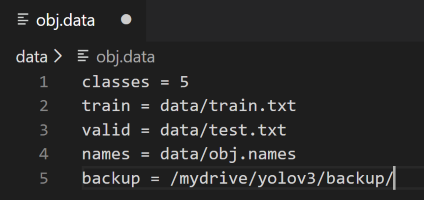

In [0]:
# obj.names ve obj.data dosyalarını Google Drive'dan bulut VM'ye yükleyin
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# c) train.txt oluşturulması

Özel dedektörümüzü eğitmeye başlamadan önce gereken son yapılandırma dosyası, tüm görüntülerimizin yollarını tutan train.txt dosyasıdır.

Komut dosyasına bu [Github Repo](https://github.com/emrecintas/Yolov3_Kendi_Nesne_Tanima_Modelini_Gelistirme/blob/master/generate_train.py) 'dan erişilebilir

Bulut sanal makinenize yükleyebilmemiz için dosyayı yerel makinenize veya Google sürücünüze indirmeniz yeterlidir.

In [0]:
# create_train.py komut dosyasını Google Drive'dan bulut VM'ye yükleyin
!cp /mydrive/yolov3/generate_train.py ./

Şimdi tüm işleri yapmak için python betiğini çalıştırıyoruz.

In [0]:
!python generate_train.py

In [0]:
# train.txt dosyasını darknet/data klasörümüzde görebilirsiniz
!ls data/

# Adım 4: Evrişimli katmanlar için önceden eğitilmiş ağırlıkları indirin

Bu adım YOLOv3 ağının evrişimli katmanları için ağırlıkları indirir. Bu ağırlıkları kullanarak, özel nesne dedektörünüzün çok daha doğru olmasına ve uzun süre antrenman yapmasına ihtiyaç kalmıyor.

In [0]:
# önceden yüklenmiş evrişim ağırlıklarını yükleyin
!wget http://pjreddie.com/media/files/darknet53.conv.74

# Adım 5: Kendi Nesne Tanıma Modelinizi Geliştirin

```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```

**İPUCU:** Bu eğitim, .cfg dosyasında kaç yineleme seçtiğinize bağlı olarak birkaç saat sürebilir. 

# **EĞİTİME BAŞLA (TRAIN)**

In [0]:
# özel dedektörünüzü eğitin
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Aşağıdaki komutu çalıştırarak modelinizin eğitim süreci boyunca nasıl bir performans sergilediğini görebilirsiniz. Ortalama kaybınızın yinelemelere karşı grafiğini gösterir. Loss grafiği belirli bir zaman sonra aynı çizgide ilerliyorsa eğitimi durdurabilirsiniz.

# **GRAFİK**

In [0]:
imShow('chart.png')

**NOT:** Herhangi bir nedenle bir hata alırsanız veya Colab'ınız antrenman sırasında boşta kalırsa, model ağırlıklarınızı kaybetmediniz! Her 100 veya 1000 yinelemede yolov3_custom_last.weights adlı bir ağırlık dosyası mydrive /yolov3/backup/ klasörüne kaydedilir (yedekleme klasörünüzün olduğu yerde). Bu nedenle bu klasörü bulut sanal makinemizde değil Google sürücümüzde oluşturduk. Çalışma zamanınız çökerse ve yedekleme klasörünüz bulut sanal makinenizdeyse, ağırlıklarınızı ve egzersiz ilerlemenizi kaybedersiniz.

Yeniden kaydetmemize gerek kalmamak için son kaydedilen ağırlık dosyamızdaki eğitimi başlatabiliriz!

# **EĞİTİME KALDIĞIN YERDEN DEVAM ET**

In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg /mydrive/yolov3/backup/yolov3_custom_train_last.weights -dont_show

**MAP HESAPLAMA**

backup klasörüne kaydedilen modellerimizin hangisinin daha iyi olduğunu anlamak ve verileri ezberleyip ezberlemediğini (overfitting) tespit etmek amacıyla son 2-3 modelde aşağıdaki kodla map (mean average precision) hesabı yapın. mAP değeri hangi modelin yüksekse onu kullanın.

***Not:*** **mAp gibi detaylı püf noktaları başka bir repoda bahsedilecektir.**

Örnek;

yolov3_custom_train_6000.weights mAp: %64.7

yolov3_custom_train_7000.weights mAp: %84.9

yolov3_custom_train_8000.weights mAp: %81.5

Kullanmamız gereken model : yolov3_custom_train_7000.weights

In [0]:
!./darknet detector map data/obj.data cfg/yolov3_custom_train.cfg /mydrive/yolov3/backup/yolov3_custom_train_6000.weights

**EĞİTİLEN MODELİNİ TEST ET !**

In [0]:
# özel dedektörünüzü bu komutla çalıştırın (test etmek için google sürücünüzde yolov3 klasörüne bir resim yükleyin)
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg /mydrive/yolov3/backup/yolov3_custom_train_7000.weights /mydrive/yolov3/test.jpg -thresh 0.3
imShow('predictions.jpg')